# Introduction to Machine Learning (session 2)

By the end of this session you will:
- Regression
- Understand linear regression
- Cross validation
- Deep learning
- Fully connected network
- Regularize neural networks

# Last session recap

![Approaches to ML](figures/Slide16.PNG)

### Last session ML algorithms: 
- Naïve Bayes
- Decision Tree
- Random Forest
- Logistic Regression as a Classifier

We used the above for **Classification** <br>
Decision Tree and Random Forest can also be used for **Regression**


Let's start with importing our libraries 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn import datasets

# ML. No. 5- Linear Regression

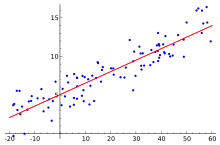

### Boston Housing Dataset
https://www.kaggle.com/c/boston-housing <br>
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [2]:
# check the dataset
boston = datasets.load_boston()

In [3]:
# diplay featuers using pandas
print(boston.feature_names)
print('shape of data: ', boston.data.shape)
print('#number of features: ', boston.data.shape[1])

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
display(boston_df.head())

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
shape of data:  (506, 13)
#number of features:  13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


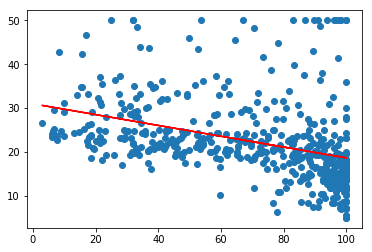

In [53]:
%matplotlib inline
from sklearn.linear_model import LinearRegression

# visualize the age feature
x = np.array( boston_df['AGE']).reshape(-1,1)
y = np.array(boston_df['target']).reshape(-1,1)
plt.scatter(x, y)

# predict the price with linear regression on one feature
lin_reg = LinearRegression()
lin_reg.fit(x, y)
plt.plot(x, lin_reg.predict(x), color='r')

### Exercise
Repeat the above for two features: AGE and DIS <br>
Go to 3D,  <br>
Split to train and test sets <br>
Visualize train points with scatter<br>
Train linear regression<br> 
Visualize the regression **plane** in 3D (stretch goal; the code is written provided for this)

shape of data:  (506, 2)
shape of target:  (506, 2)


<IPython.core.display.Javascript object>


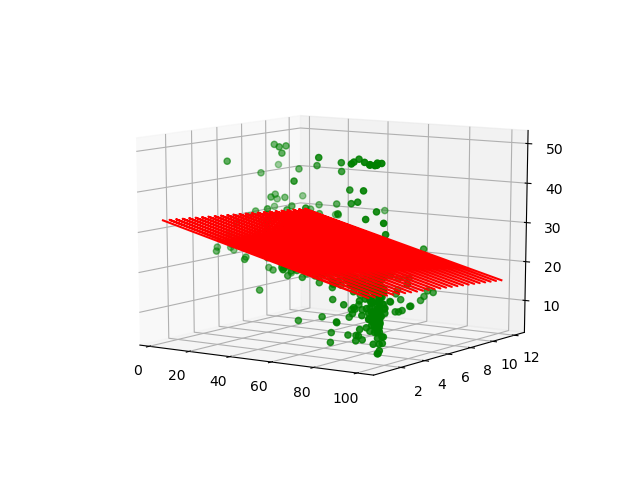

<IPython.core.display.Javascript object>


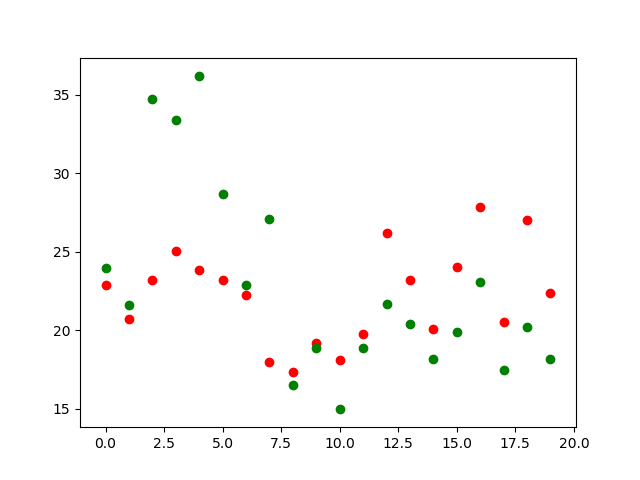

In [9]:
#repeat the above for two features, go to 3D

%matplotlib notebook
from sklearn.linear_model import LinearRegression
x1 = np.array(boston_df['AGE']).reshape(-1,1)
x2 = np.array(boston_df['DIS']).reshape(-1,1)

X = np.concatenate([x1, x2], axis=1)
y = np.array(boston_df['target']).reshape(-1,1)

print('shape of data: ', X.shape)
print('shape of target: ', X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#your code
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#

h = 0.5
h_min, h_max = x1.min() - .5, x1.max() + .5
v_min, v_max = x2.min() - .5, x2.max() + .5
hh, vv = np.meshgrid(np.arange(h_min, h_max, h), np.arange(v_min, v_max, h))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='green')
ax.plot(hh.ravel(), vv.ravel(), lin_reg.predict(np.concatenate([np.expand_dims(hh.ravel(), axis=1), 
                                           np.expand_dims(vv.ravel(), axis=1)], axis=1)).ravel(), 'r')

y_predicted = lin_reg.predict(X)
to_show = 20
fig = plt.figure()
plt.scatter(np.arange(to_show), y_predicted[:to_show], color='red')
plt.scatter(np.arange(to_show), y[:to_show], color='green')

# Mitigate randomness in results

### Repeat Experiments

In [75]:
from sklearn.linear_model import LinearRegression

x1 = np.array(boston_df['AGE']).reshape(-1,1)
x2 = np.array(boston_df['DIS']).reshape(-1,1)
X = np.concatenate([x1, x2], axis=1)
y = boston_df['target'].reshape(-1,1)

average = 0
num_tries = 200
for i in range(num_tries):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2)#, random_state=5)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_test_predicted = lin_reg.predict(X_test)
    error = (((y_test_predicted - y_test)**2)).mean()
    average += error

average /= num_tries
print('average: ', average)

average:  72.5559179857


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


### K-Fold Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
x1 = np.array(boston_df['AGE']).reshape(-1,1)
x2 = np.array(boston_df['DIS']).reshape(-1,1)
X = np.concatenate([x1, x2], axis=1)
y = np.array(boston_df['target']).reshape(-1,1)

lin_reg = LinearRegression()
results_mae = cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_absolute_error')
results_mse = cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_squared_error')

print('Average cross validated MAE: ', -np.mean(results_mae))
print('Average cross validated MSE: ', -np.mean(results_mse))


Average cross validated MAE:  6.39019488944
Average cross validated MSE:  78.9268218264


# ML. No. 6, 7, 8, 9, 10

- K-nearest neighbour
- k-means
- Expectation Maximization (EM)
- SVM
- Self Organizing Map (SOM)

# ML. No. 11- Deep Learning

One weight per connection <br>
$8 \times 9 + 9 \times 9 + 9 \times 9 + 9 \times 4$ <br>


A fully connected (Dense) neural network <br>
- 8 inputs
- 4 outputs
- 3 hidden layers
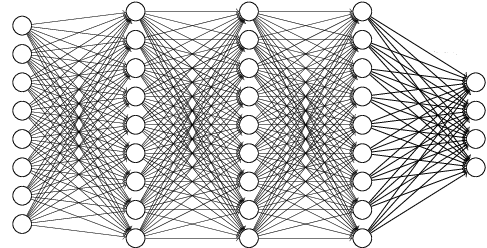

Single fully connected (Dense) neuron
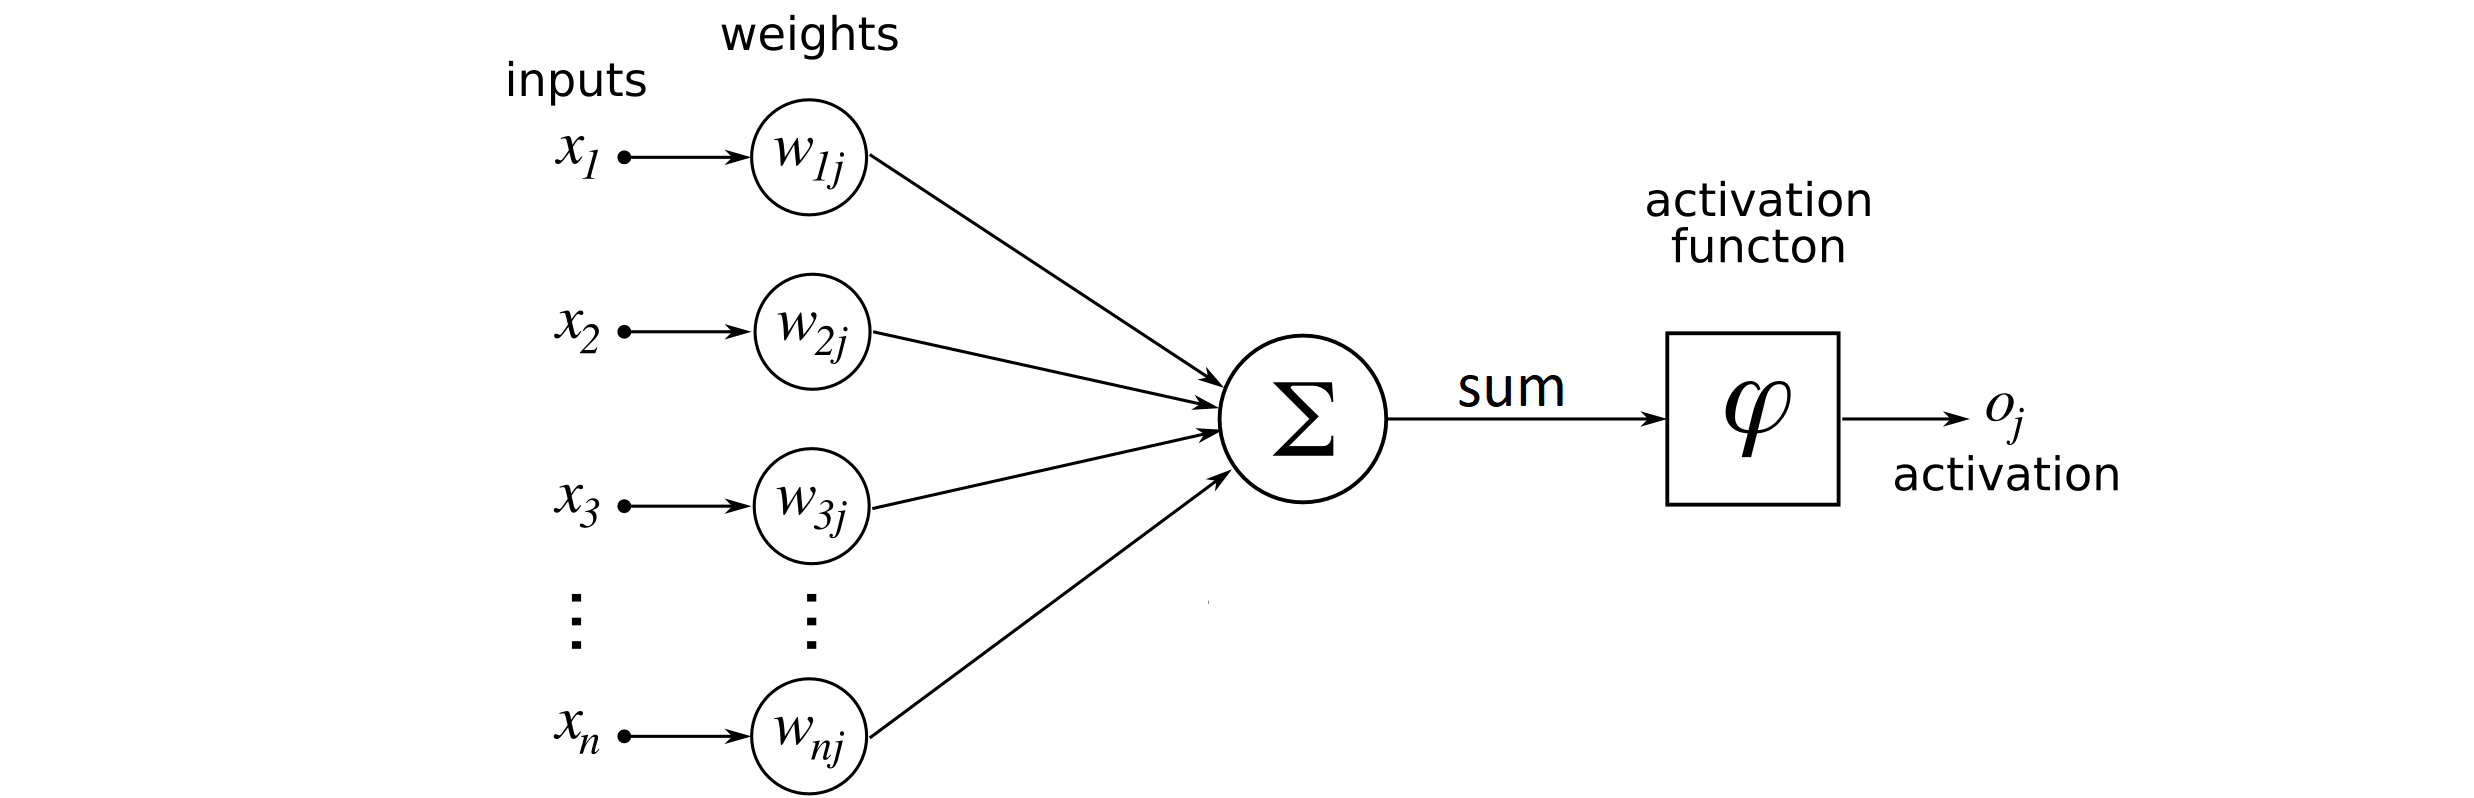

![activations](http://uc-r.github.io/public/images/analytics/deep_learning/activations-1.png)
Credit: http://uc-r.github.io/ann_fundamentals

We want to create the following network to predict housing prices in Boston:
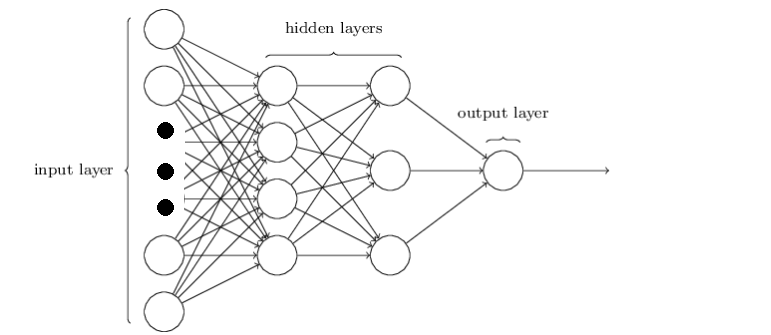

### Gradient Descent

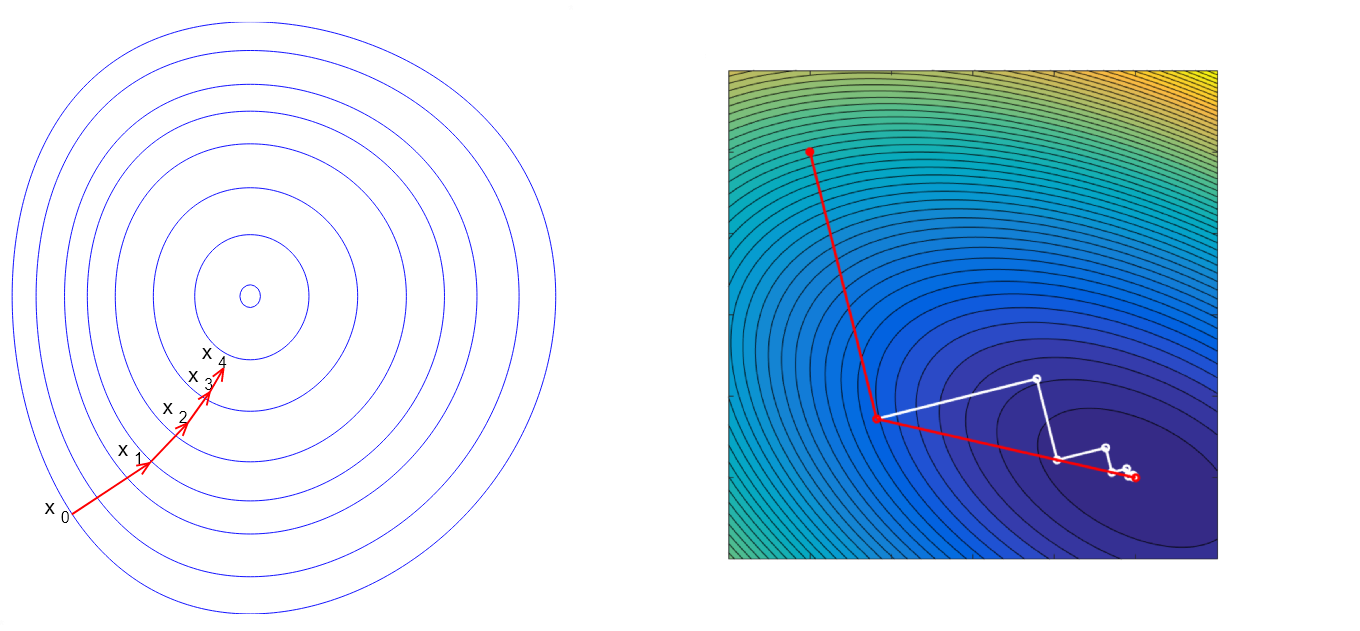

$\eta$ : learning rate <br>
$J(w)$: loss function <br>
$w$: weights of the neural network
Optimization approaches:<br>
- **Gradient Descent**: In each epoch visit **all samples** then update weights only once<br>
$w = w - \dfrac{\eta}{n} \sum_i^n \nabla J_i(w)$
- **Stochastic Gradient Descent**: In each iteration, visit **one sample**, update weights based on that single sample <br>
$w = w - \eta {\nabla J_i(w)}$
- **Mini-batch Gradient Descent**: In each iteration, visit a **batch of samples**, update weights based on that batch <br>
$w = w - \eta \nabla J_b(w)$, <br>
where $b$ is a batch of 1 to n samples

**Epoch**: whenever your model in DNN sees all the samples once, we call this an epoch!

### two approaches in defining a model in keras
- Sequential: easier
- Functional: more flexible

### Let's predict the house prices of Boston using a deep neural network

- **Regression problem**
- Let's use a mean square error loss function:<br>
$J(w)= 1/n \sum_{i}^n{(y_i-f_\theta(x_i))^2} $

In [147]:
import keras #wrapper over tensorflow , theano

from keras.layers import Dense, Input, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.initializers import random_normal, zeros


my_initializer = random_normal() # you can set mean and std if you like

boston = datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.2, 
                                                    random_state=5)

my_inputs = Input(shape=[boston.data.shape[1]])
t = Dense(40, 
             kernel_initializer=my_initializer,
         bias_initializer=zeros(), activation='relu')(my_inputs)
t = BatchNormalization()(t)
t = Dense(30, 
          kernel_initializer=my_initializer,
         bias_initializer=zeros(), activation='relu')(t)
t = Dense(1, 
          kernel_initializer=my_initializer,
         bias_initializer=zeros())(t)

# my_optmizer = SGD(lr=0.01, decay=0.99) 
my_optmizer = Adam()  # B1 and B2 --> you can set if you like but read the 
# paper first if you decided to do so!
model = Model(inputs=my_inputs, outputs=t)

model.compile(optimizer=my_optmizer, loss='mse', metrics=['mae'])
callback_results = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
         epochs=200, shuffle=True,
         batch_size = 100)

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 2s 5ms/step - loss: 598.4622 - mean_absolute_error: 22.6388 - val_loss: 563.9397 - val_mean_absolute_error: 22.0351
Epoch 2/200
404/404 [==============================] - 0s 54us/step - loss: 596.0902 - mean_absolute_error: 22.5854 - val_loss: 561.2653 - val_mean_absolute_error: 21.9711
Epoch 3/200
404/404 [==============================] - 0s 42us/step - loss: 593.4697 - mean_absolute_error: 22.5266 - val_loss: 557.6464 - val_mean_absolute_error: 21.8882
Epoch 4/200
404/404 [==============================] - 0s 45us/step - loss: 590.5163 - mean_absolute_error: 22.4586 - val_loss: 553.8757 - val_mean_absolute_error: 21.7962
Epoch 5/200
404/404 [==============================] - 0s 52us/step - loss: 587.0343 - mean_absolute_error: 22.3787 - val_loss: 549.7805 - val_mean_absolute_error: 21.6942
Epoch 6/200
404/404 [==============================] - 0s 42us/step - loss: 582.5615 - mean_abs

404/404 [==============================] - 0s 45us/step - loss: 34.0033 - mean_absolute_error: 3.6646 - val_loss: 47.7231 - val_mean_absolute_error: 4.4276
Epoch 97/200
404/404 [==============================] - 0s 40us/step - loss: 34.5743 - mean_absolute_error: 3.7216 - val_loss: 47.3236 - val_mean_absolute_error: 4.3726
Epoch 98/200
404/404 [==============================] - 0s 50us/step - loss: 34.0006 - mean_absolute_error: 3.6901 - val_loss: 44.2254 - val_mean_absolute_error: 4.2183
Epoch 99/200
404/404 [==============================] - 0s 45us/step - loss: 29.8876 - mean_absolute_error: 3.3832 - val_loss: 42.7635 - val_mean_absolute_error: 4.1726
Epoch 100/200
404/404 [==============================] - 0s 47us/step - loss: 30.7502 - mean_absolute_error: 3.6150 - val_loss: 36.8946 - val_mean_absolute_error: 4.1109
Epoch 101/200
404/404 [==============================] - 0s 42us/step - loss: 28.5073 - mean_absolute_error: 3.5644 - val_loss: 33.9664 - val_mean_absolute_error: 4.01

Epoch 144/200
404/404 [==============================] - 0s 47us/step - loss: 20.6316 - mean_absolute_error: 3.1580 - val_loss: 25.1104 - val_mean_absolute_error: 4.0390
Epoch 145/200
404/404 [==============================] - 0s 42us/step - loss: 20.2060 - mean_absolute_error: 3.2431 - val_loss: 24.3204 - val_mean_absolute_error: 3.9623
Epoch 146/200
404/404 [==============================] - 0s 40us/step - loss: 21.5157 - mean_absolute_error: 3.3471 - val_loss: 21.7823 - val_mean_absolute_error: 3.6234
Epoch 147/200
404/404 [==============================] - 0s 50us/step - loss: 22.2507 - mean_absolute_error: 3.4786 - val_loss: 24.4719 - val_mean_absolute_error: 3.9301
Epoch 148/200
404/404 [==============================] - 0s 45us/step - loss: 22.4328 - mean_absolute_error: 3.5047 - val_loss: 19.6910 - val_mean_absolute_error: 3.2431
Epoch 149/200
404/404 [==============================] - 0s 62us/step - loss: 20.1609 - mean_absolute_error: 3.2643 - val_loss: 30.0596 - val_mean_abs

102/102 [==============================] - 0s 98us/step
[280.04523213704425, 14.31543909334669]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,span=20).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,span=20).mean()
  """


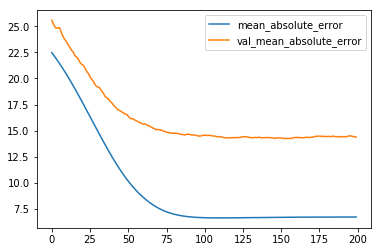

In [146]:
print(model.evaluate(X_test, y_test) )
%matplotlib inline
plt.plot(pd.ewma(pd.Series(callback_results.history['mean_absolute_error']), span=20), 
         label='mean_absolute_error')
plt.plot(pd.ewma(pd.Series(callback_results.history['val_mean_absolute_error']), span=20), 
         label='val_mean_absolute_error')
plt.legend()

102/102 [==============================] - 0s 108us/step
[20.426165917340448, 2.9695528488533172]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,span=20).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,span=20).mean()
  """


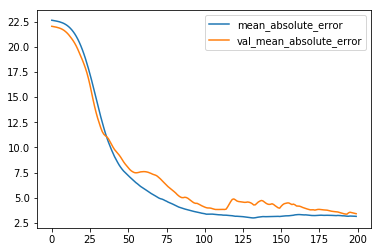

In [144]:
print(model.evaluate(X_test, y_test) )
%matplotlib inline
plt.plot(pd.ewma(pd.Series(callback_results.history['mean_absolute_error']), span=20), 
         label='mean_absolute_error')
plt.plot(pd.ewma(pd.Series(callback_results.history['val_mean_absolute_error']), span=20), 
         label='val_mean_absolute_error')
plt.legend()

## Overfitting

In [153]:

# load boston again
boston = datasets.load_boston()

# functional approach of keras
import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.initializers import RandomNormal, Zeros
from keras.regularizers import l2

my_initializer = RandomNormal(seed=123)

inputs = Input(shape=[boston.data.shape[1]])
t = Dense(10, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(inputs)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(1, activation='linear', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t) #last layer
model = Model(inputs=inputs, outputs=t)
optimizer= Adam() # rmsprop + momentum
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    test_size=0.2, random_state=30)
callback_results = model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          shuffle=True,
          batch_size=200, epochs=1000, verbose=0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,span=20).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,span=20).mean()
  """


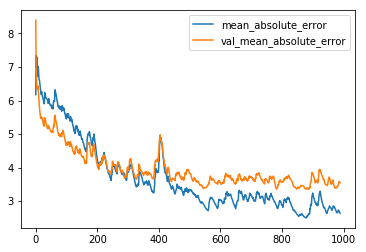

In [154]:
%matplotlib inline
plot_start_epoch = 10
plt.plot(pd.ewma(pd.Series(callback_results.history['mean_absolute_error'][plot_start_epoch:]), span=20), 
         label='mean_absolute_error')
plt.plot(pd.ewma(pd.Series(callback_results.history['val_mean_absolute_error'][plot_start_epoch:]), span=20), 
         label='val_mean_absolute_error')
plt.legend()

### Regularization in deep learning
- batch normalization
- penalty on weights
- Dropout

### Exercise
Change the cell below and increase the regularization of your model, including:
- add Dropout layers (https://keras.io/layers/core/#dropout)
- Add penalty (regularization) to weights of some layers
- Add batch normalization layers

In [ ]:

# load boston again
boston = datasets.load_boston()

# functional approach of keras
import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.initializers import RandomNormal, Zeros
from keras.regularizers import l2

my_initializer = RandomNormal(seed=123)

inputs = Input(shape=[boston.data.shape[1]])
t = Dense(10, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(inputs)
# t = BatchNormalization()(t)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(300, activation='relu', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t)
t = Dense(1, activation='linear', kernel_initializer=my_initializer,
                                 bias_initializer=Zeros())(t) #last layer
model = Model(inputs=inputs, outputs=t)
optimizer= Adam() # rmsprop + momentum
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    test_size=0.2, random_state=30)
callback_results = model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          shuffle=True,
          batch_size=200, epochs=1000, verbose=0)